In [1]:
from statisco import StockDataFrame
from statisco.predictors import GRU
import matplotlib.pyplot as plt

In [2]:
msft = StockDataFrame(ticker="MSFT", start="2022-01-01", end="2022-12-31", interval="1d")

In [3]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,327.530090,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,321.913910,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,309.556305,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,307.110260,39646100
2022-01-07,314.149994,316.500000,310.089996,314.040009,307.266754,32720000
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,235.769760,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,234.021729,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,231.621841,17457100


In [4]:
msft.normalize(inplace=True)

In [5]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,0.242087
2022-01-04,0.995586,0.976189,0.968543,0.952365,0.951805,0.288983
2022-01-05,0.919440,0.898546,0.881392,0.847552,0.845760,0.379838
2022-01-06,0.811545,0.835870,0.842802,0.826805,0.824770,0.374812
2022-01-07,0.820034,0.817161,0.830769,0.828133,0.826113,0.289545
...,...,...,...,...,...,...
2022-12-23,0.157555,0.156986,0.176279,0.203153,0.212570,0.147808
2022-12-27,0.179542,0.157496,0.192523,0.188465,0.197569,0.092182
2022-12-28,0.164177,0.164215,0.178255,0.168299,0.176975,0.101643


In [6]:
model = GRU()

In [7]:
timeseries, train_plot, test_plot = model.train(msft, "Close", n_epochs=1300, plot_results=True)

epoch: 0, loss: 0.01949087716639042, rmse: 0.13960972428321838
epoch: 100, loss: 0.005643119569867849, rmse: 0.0751207023859024
epoch: 200, loss: 0.00532095693051815, rmse: 0.07294488698244095
epoch: 300, loss: 0.005073184613138437, rmse: 0.07122629135847092
epoch: 400, loss: 0.004362126346677542, rmse: 0.06604639440774918
epoch: 500, loss: 0.004273256752640009, rmse: 0.06537014991044998
epoch: 600, loss: 0.004402086604386568, rmse: 0.06634822487831116
epoch: 700, loss: 0.0038910822477191687, rmse: 0.06237854063510895
epoch: 800, loss: 0.003438076004385948, rmse: 0.058635108172893524
epoch: 900, loss: 0.004110426642000675, rmse: 0.06411261111497879
epoch: 1000, loss: 0.00411093607544899, rmse: 0.06411658227443695
epoch: 1100, loss: 0.0036465271841734648, rmse: 0.06038648262619972
epoch: 1200, loss: 0.0038468893617391586, rmse: 0.06202329695224762
epoch: 1299, loss: 0.003149941097944975, rmse: 0.05612433701753616


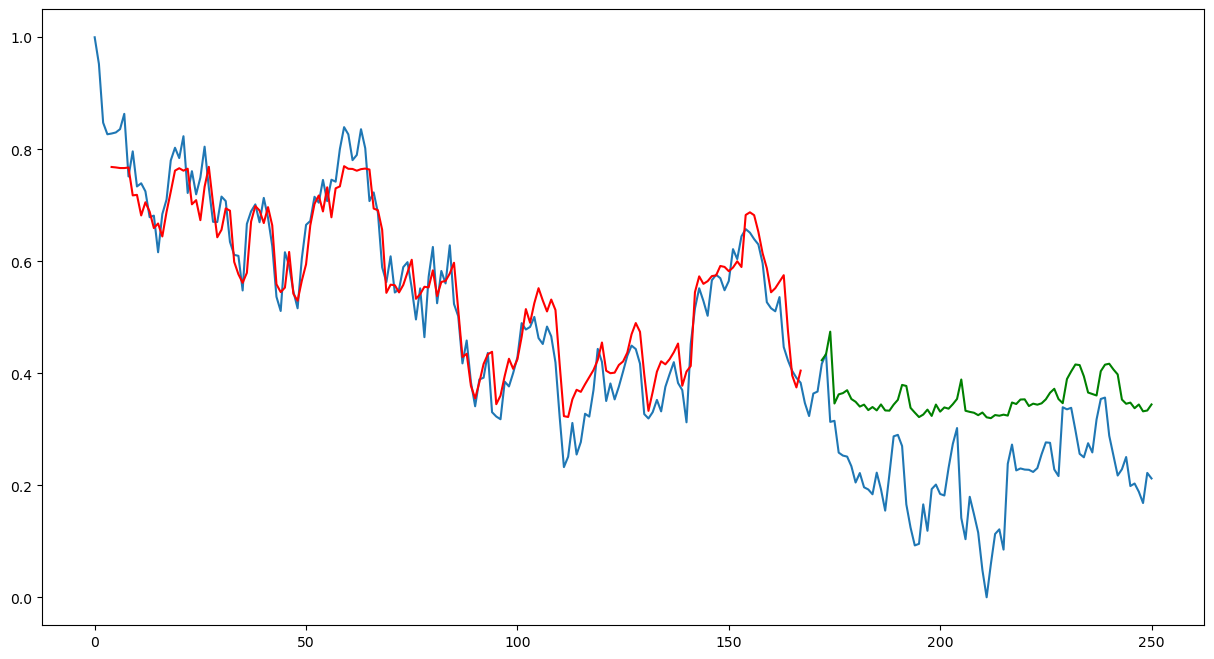

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [9]:
true_vals = model.X_train[100:102].flatten()
future_preds = model.predict(index=100, future=4).flatten()

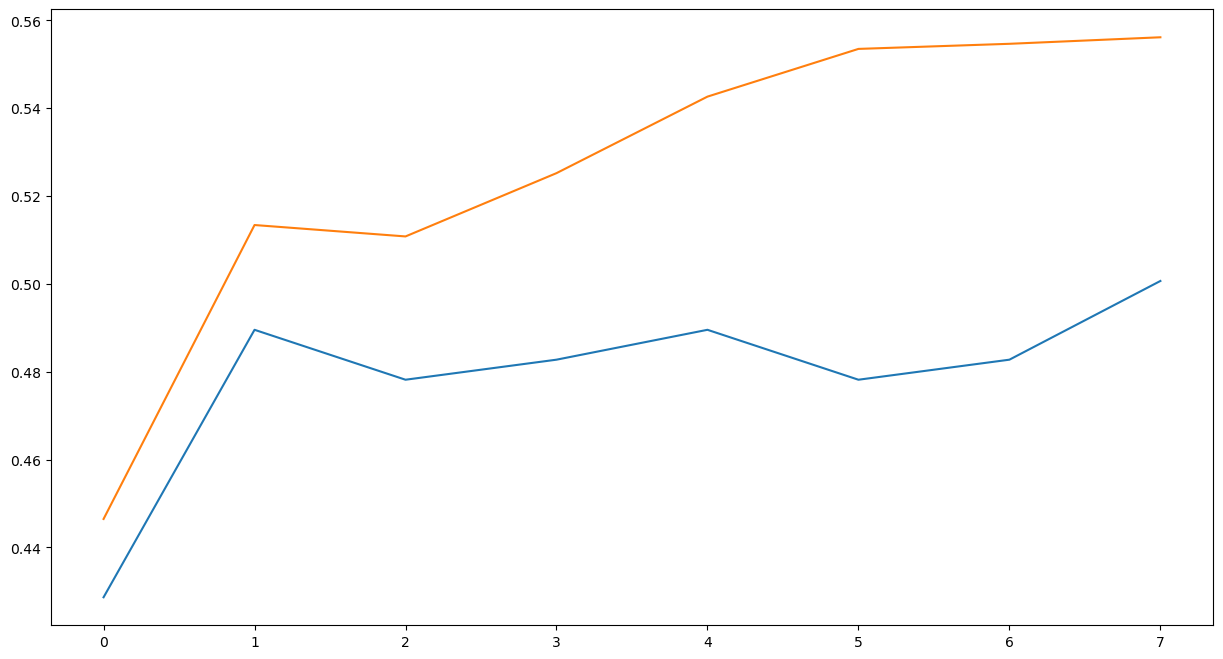

In [10]:
plt.figure(figsize=(15, 8))
plt.plot(true_vals)
plt.plot(future_preds)
plt.show()

In [11]:
model.save()